# Housing Price Prediction

**Objectives**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, we need to determine the optimal value of lambda for ridge and lasso regression.

**Business Goal**

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting option to display all the columns in dataset
pd.set_option('display.max_columns', 500)

In [3]:
# Setting option to display 300 rows in dataset
pd.set_option('display.max_rows', 300)

In [4]:
# Setting plot style to ggplot
plt.style.use('ggplot')

In [5]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Importing data

In [6]:
df = pd.read_csv('train.csv')

# Data Understanding, Exploration & Cleaning

## Checking size of the dataset

In [7]:
df.shape

(1460, 81)

## Checking first few rows

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Checking the summary statistics of the dataset

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Checking the data types and nullability of columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Checking columns which have NULL values

In [11]:
import missingno as mno

<AxesSubplot:>

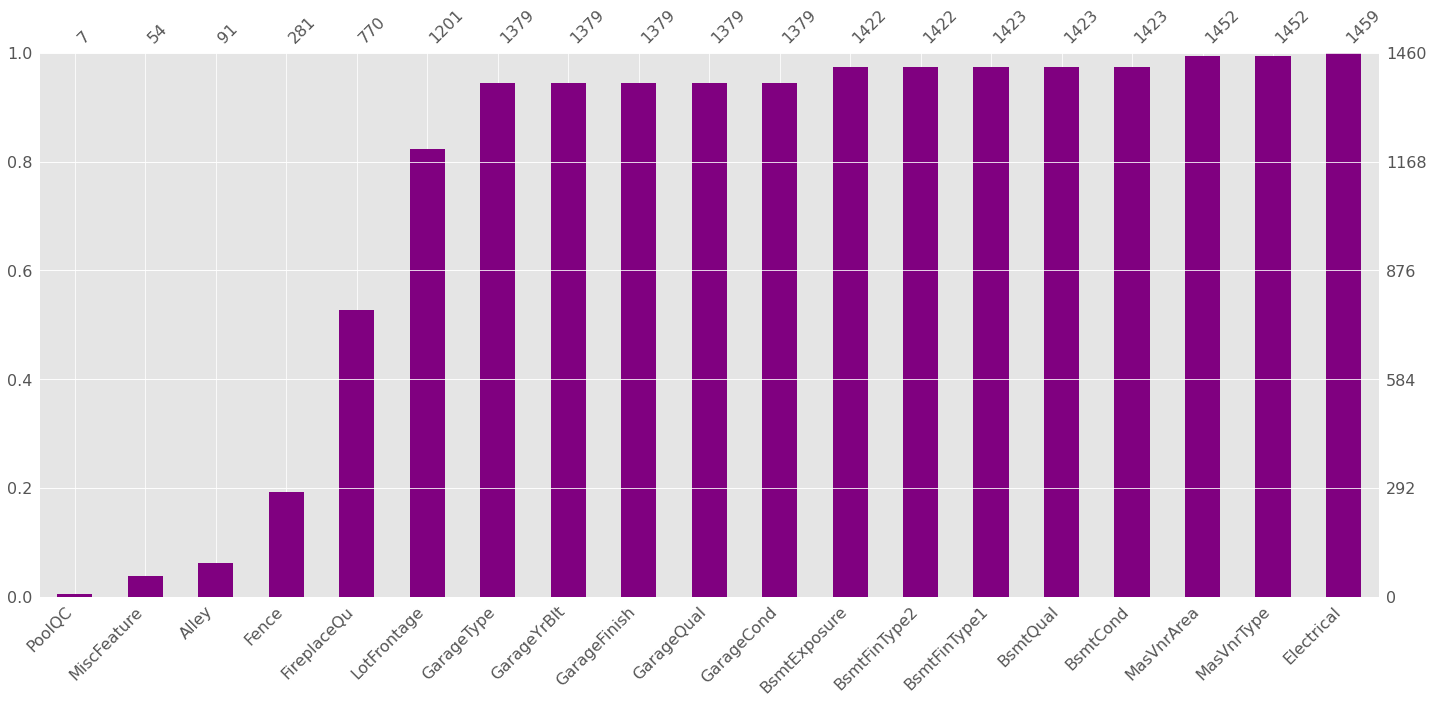

In [12]:
mno.bar(df[df.columns[df.isna().any()]], sort="ascending", color='purple')

We can see 19 columns having NULL values in the order of most NULLs to least NULLs

In [13]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [14]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [15]:
# Columns with NULL values and % of NULLs are populated in descending order
null_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


### Dropping NULLs for columns above 15%

In [16]:
null_data[ null_data['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [17]:
# Dropping these columns from the dataframe `df`
df.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)

In [18]:
# Checking Shape
df.shape

(1460, 75)

In [19]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


#### Checking the data in the columns having NULL values < 15%

Countplot to check the occurence of most frequent values in the columns

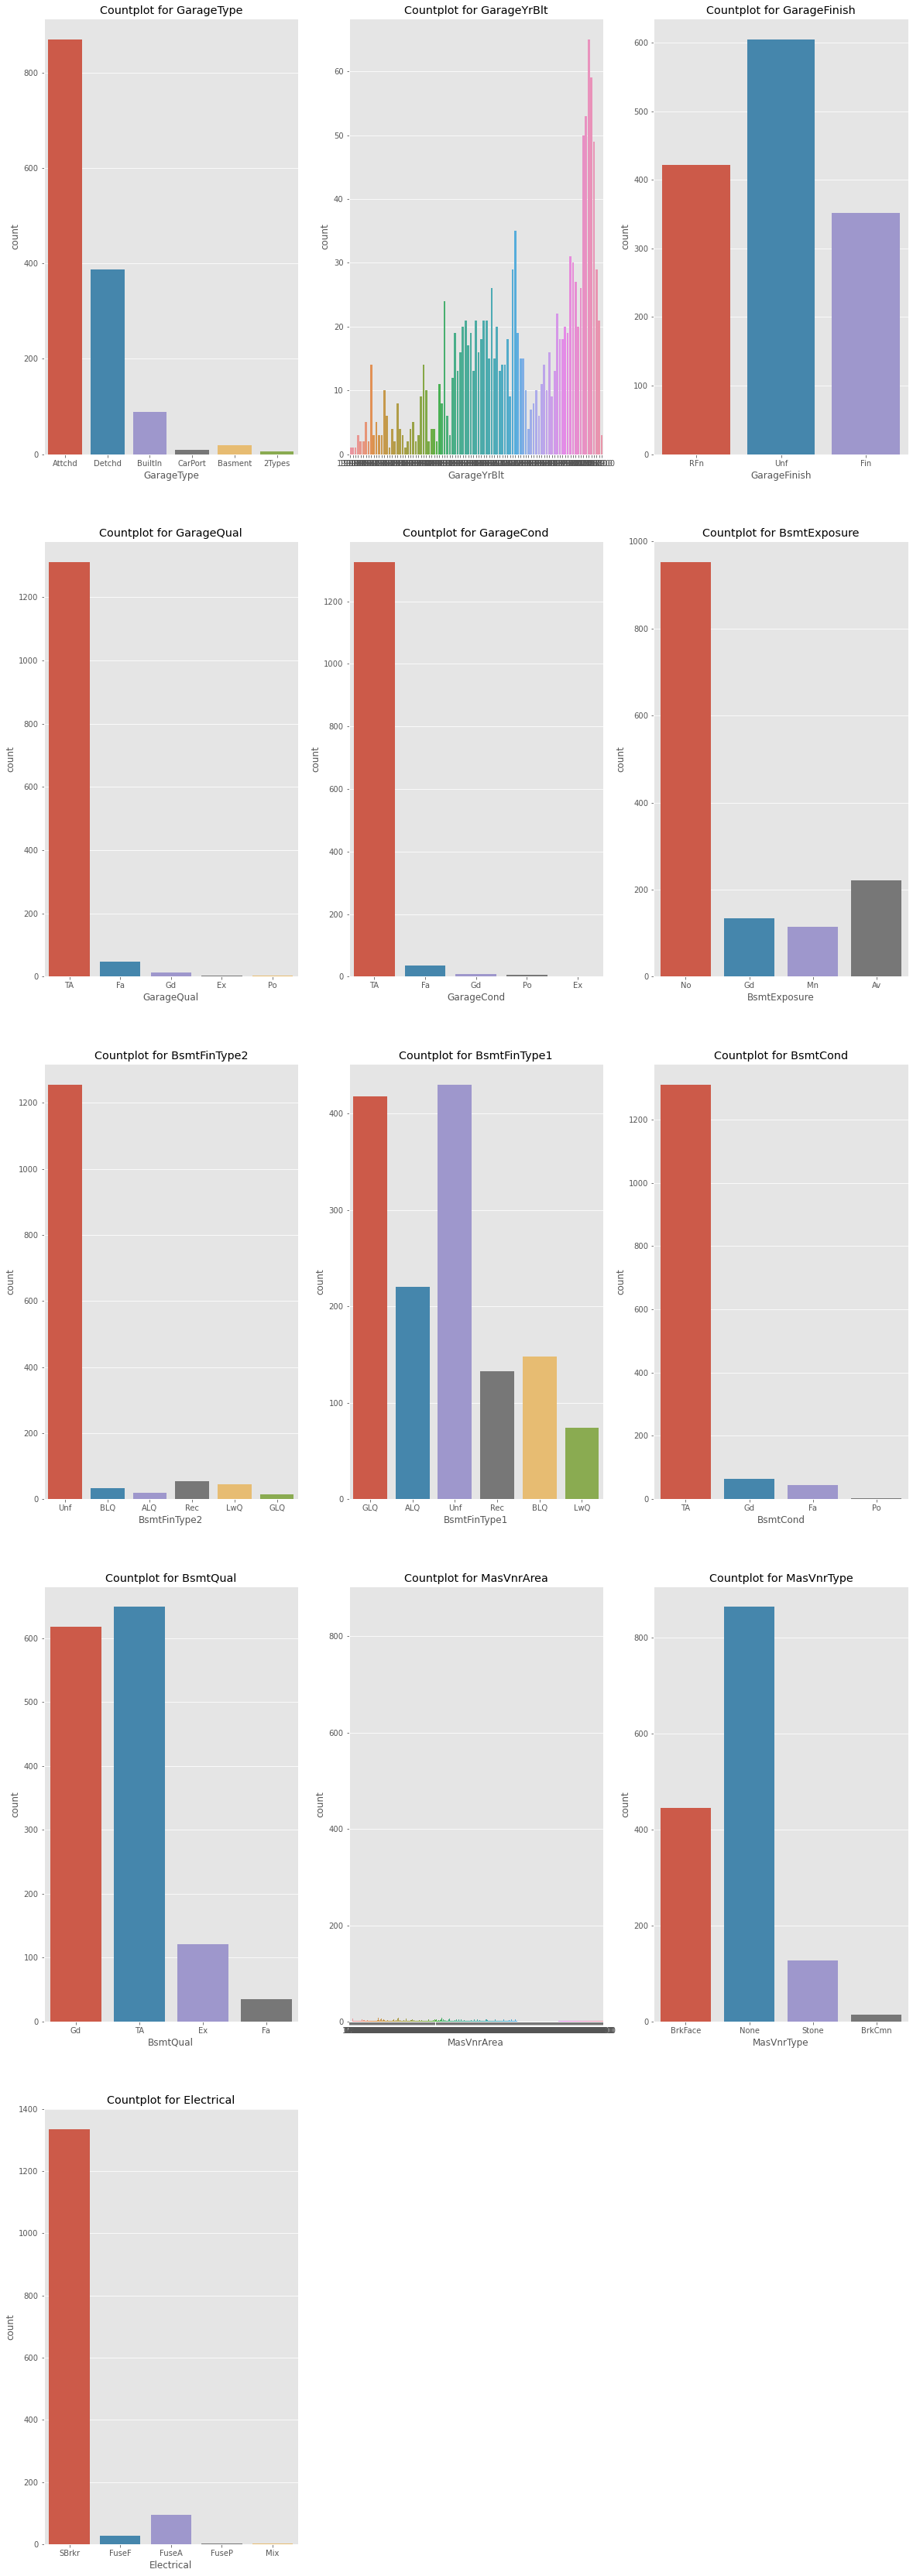

In [20]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(df[var])
    plt.title(f"Countplot for {var}")

#### For these columns, we will perform imputation using the below approach:
- If the column is `categorical`, we will use mode() to replace the missing values
- If the column is `numerical`, we will use median() to replace the missing values
- If the column value `NA` has a meaningful value (For e.g. `GarageType` = NA refers to "No Garage"). We will replace these values with `None`

In [21]:
# Impute "GarageType" with 'None' as it has a meaningful value
df['GarageType'].fillna('None', inplace=True)

In [22]:
# Impute "GarageYrBlt" with Median value
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [23]:
# Impute "GarageFinish" with 'None' as it has a meaningful value
df['GarageFinish'].fillna('None', inplace=True)

In [24]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df['GarageQual'].fillna('None', inplace=True)

In [25]:
# Impute "GarageQual" with 'None' as it has a meaningful value
df['GarageCond'].fillna('None', inplace=True)

In [26]:
# Impute "BsmtExposure" with 'None' as it has a meaningful value
df['BsmtExposure'].fillna('None', inplace=True)

In [27]:
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
df['BsmtFinType2'].fillna('None', inplace=True)

In [28]:
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
df['BsmtFinType1'].fillna('None', inplace=True)

In [29]:
# Impute "BsmtCond" with 'None' as it has a meaningful value
df['BsmtCond'].fillna('None', inplace=True)

In [30]:
# Impute "BsmtQual" with 'None' as it has a meaningful value
df['BsmtQual'].fillna('None', inplace=True)

In [31]:
# Impute "MasVnrArea" with Median value
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [32]:
# Impute "MasVnrType" with Mode value
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [33]:
# Impute "Electrical" with Mode value
val = df['Electrical'].mode()[0]
df['Electrical'].fillna(val, inplace=True)

Running the NULL value check again to see if there are any null values left over

In [34]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


## Dropping unimportant columns

We will be dropping the columns based on:
1. If the variance in the column is very less, then it provides little scope for the model to learn. We will be dropping these columns
2. Few columns are not important such as `Id` as they don't provide any meaningful insights. We will remove these as well

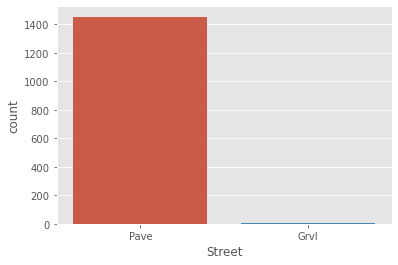

In [35]:
# Dropping "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
sns.countplot(df['Street'])
df.drop(columns='Street', inplace=True)

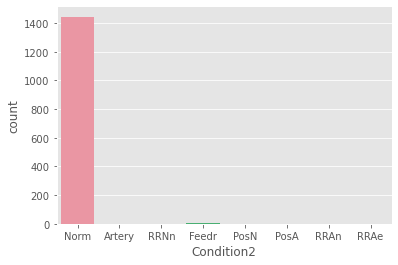

In [36]:
# Dropping "Condition2" as it doesn't contain much variance. Most values are assigned to "Norm"
sns.countplot(df['Condition2'])
df.drop(columns='Condition2', inplace=True)

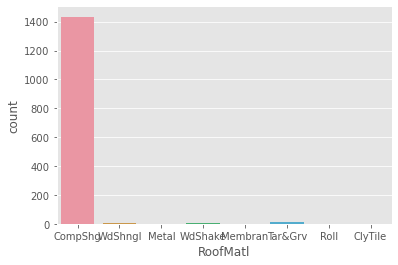

In [37]:
# Dropping "RoofMatl" as it doesn't contain much variance. Most values are assigned to "CompShg"
sns.countplot(df['RoofMatl'])
df.drop(columns='RoofMatl', inplace=True)

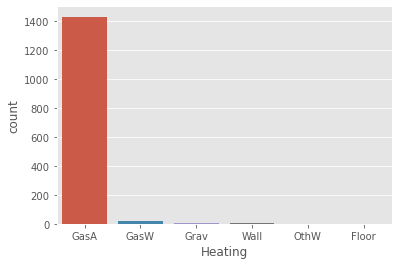

In [38]:
# Dropping "Heating" as it doesn't contain much variance. Most values are assigned to "GasA"
sns.countplot(df['Heating'])
df.drop(columns='Heating', inplace=True)

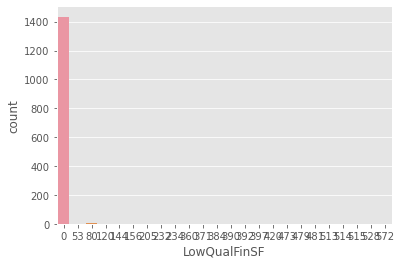

In [39]:
# Dropping "LowQualFinSF" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df['LowQualFinSF'])
df.drop(columns='LowQualFinSF', inplace=True)

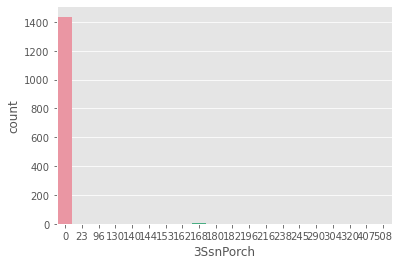

In [40]:
# Dropping "3SsnPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df['3SsnPorch'])
df.drop(columns='3SsnPorch', inplace=True)

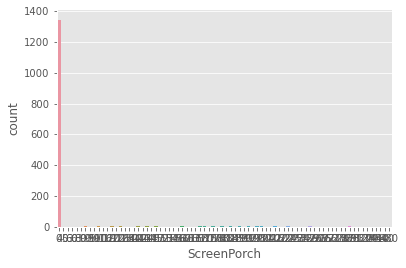

In [41]:
# Dropping "ScreenPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df['ScreenPorch'])
df.drop(columns='ScreenPorch', inplace=True)

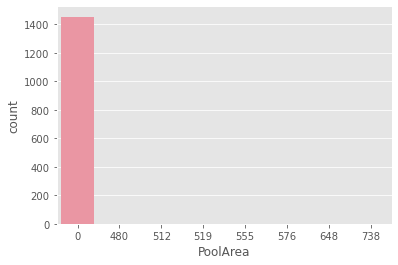

In [42]:
# Dropping "PoolArea" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df['PoolArea'])
df.drop(columns='PoolArea', inplace=True)

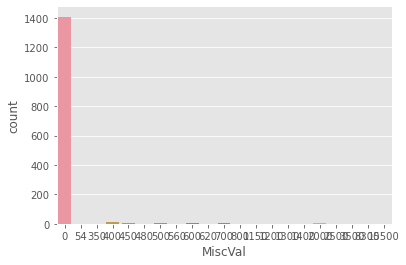

In [43]:
# Dropping "MiscVal" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(df['MiscVal'])
df.drop(columns='MiscVal', inplace=True)

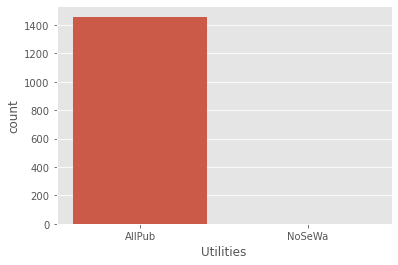

In [44]:
# Dropping "Utilities" as it doesn't contain much variance. Most values are assigned to "AllPub"
sns.countplot(df['Utilities'])
df.drop(columns='Utilities', inplace=True)

In [45]:
# Dropping "Id" columns as it's not important
df.drop(columns='Id', inplace=True)

Checking the shape of the dataset after dropping above columns

In [46]:
df.shape

(1460, 64)

In [47]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,12,2008,WD,Normal,250000


## Handling Year columns

We have 4 year columns. With this, we will create Age columns that track the time in year and remove these columns.
<br> Age will be calculated by subtracting the Year from the current Year for each column.
- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold

In [48]:
CurrentYear = 2021

In [49]:
df['Age_Built_Years'] = CurrentYear - df['YearBuilt']

In [50]:
df['Age_RemodAdd_Years'] = CurrentYear - df['YearRemodAdd']

In [51]:
df['Age_GarageYrBlt_Years'] = CurrentYear - df['GarageYrBlt']

In [52]:
df['Age_YrSold_Years'] = CurrentYear - df['YrSold']

We will now proceed with dropping all Year columns

In [53]:
df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [54]:
df.shape

(1460, 64)

## Check the data type of all the columns

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   MSZoning               1460 non-null   object 
 2   LotArea                1460 non-null   int64  
 3   LotShape               1460 non-null   object 
 4   LandContour            1460 non-null   object 
 5   LotConfig              1460 non-null   object 
 6   LandSlope              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  RoofStyle              1460 non-null   object 
 14  Exterior1st            1460 non-null   object 
 15  Exte

After manual inspection of each column, we find that all columns are mapped to the right data types

In [56]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:
# Getting numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

## Checking the distribution of the target variable `SalePrice`

<Figure size 1440x1080 with 0 Axes>

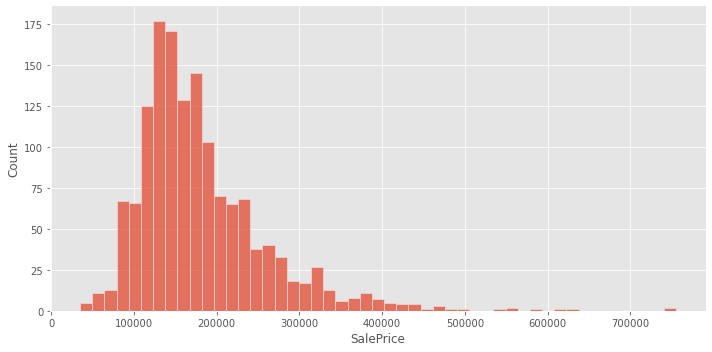

In [58]:
plt.figure(figsize=[20,15])
sns.displot(df['SalePrice'], aspect=2)
plt.show()

**Note**
- Looking at the distribution, we can see that the distribution is skewed towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.
- In such cases, we cannot cap the values as Linear Regression models are interpolated and not extrapolated (i.e. Model will make wrong predictions in case of high Sales Prices).

### Checking skew value of `SalePrice`

In [59]:
df['SalePrice'].skew()

1.8828757597682129

The rule of thumb for checking skewness:

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

As skewness is more than 1, in our case, we conclude that the column `SalePrice` is highly skewed

### Checking kurtosis value of `SalePrice`

In [60]:
df['SalePrice'].kurtosis()

6.536281860064529

**Note**
- kurtosis measures the tail-heaviness of the distribution
- For a normal distribution, kurtosis value is 3
- As kurtosis value increase, the tail heaviness also increases and vice-versa

In our case as the `kurtosis` value is more than ~6.5, distribution tail is heavier

### Handling `SalePrice` high skewness and kurtosis

To handle this, we will perform `Log Transformation` on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data.

<Figure size 1440x1080 with 0 Axes>

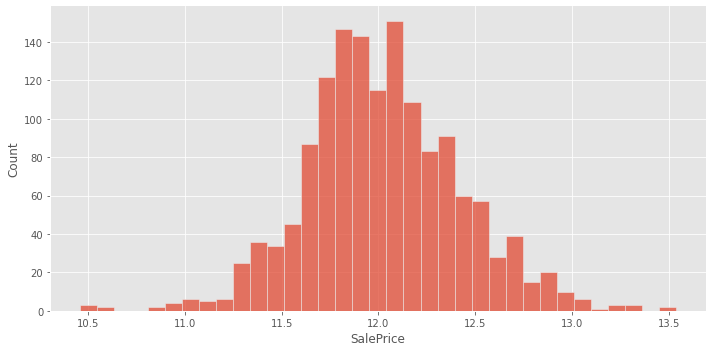

In [61]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

Now the data follows more or less a `normal distribution`

In [62]:
# Create Log Transformed "SalePrice" column
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

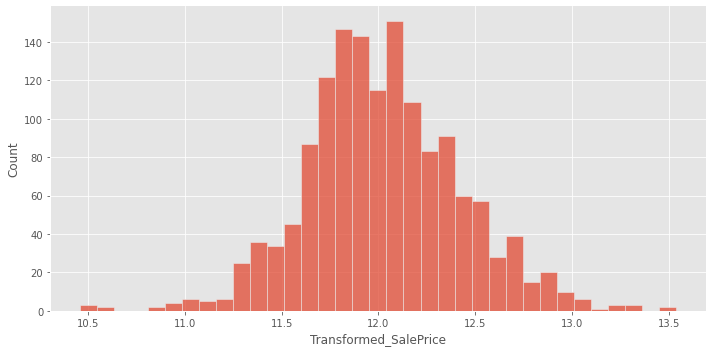

In [63]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(df['Transformed_SalePrice'], aspect=2)
plt.show()

In [64]:
# Checking if the newly added field is present in the dataset
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,WD,Normal,208500,18,18,18.0,13,12.247694
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,WD,Normal,181500,45,45,45.0,14,12.109011
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,WD,Normal,223500,20,19,20.0,13,12.317167
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,WD,Abnorml,140000,106,51,23.0,15,11.849398
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,WD,Normal,250000,21,21,21.0,13,12.429216


In [65]:
df.shape

(1460, 65)

## Exploratory Data Analysis

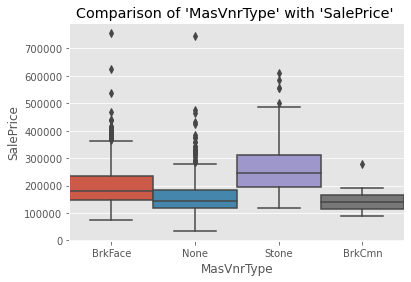

In [66]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

`Stone` Masonry Veneer Type has higher median Sales Price compared to other Veneer Types

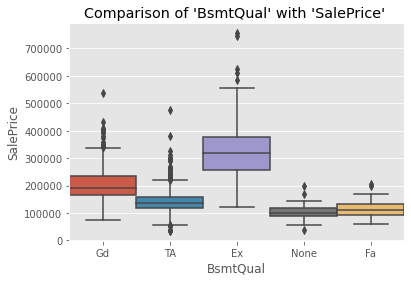

In [67]:
var = 'BsmtQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

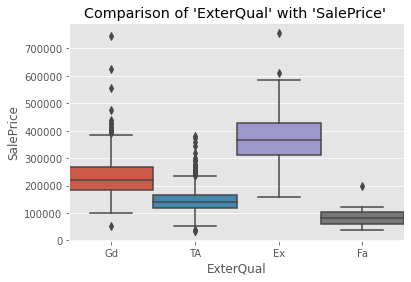

In [68]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As Exterior quality increases from Fair to Excellent, we see a corresponding increase in SalePrice

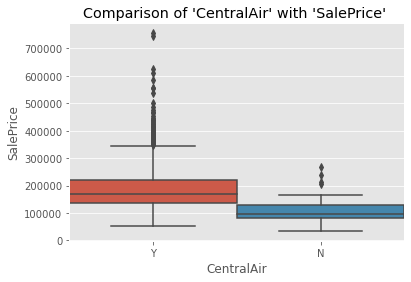

In [69]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning

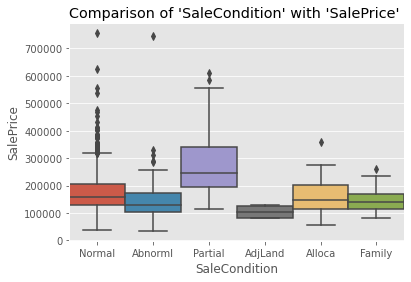

In [70]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.

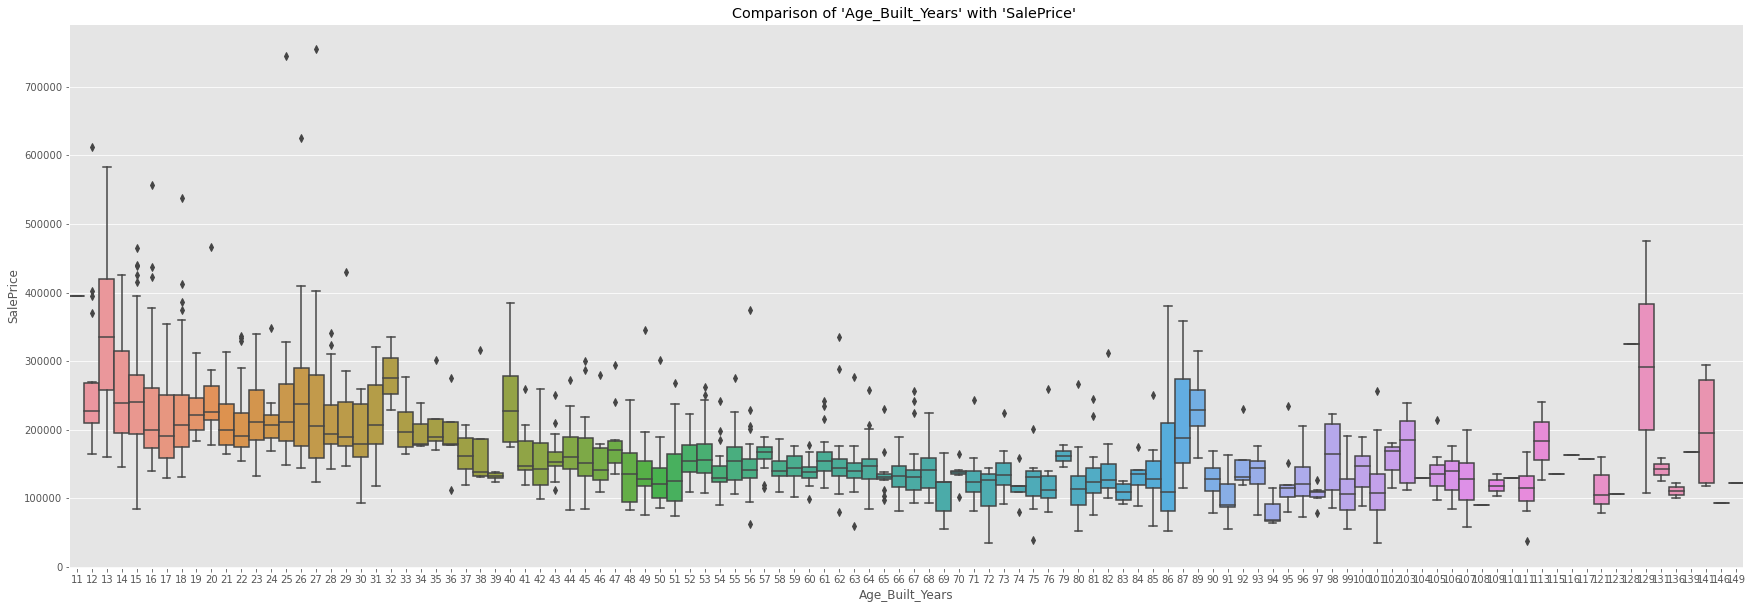

In [71]:
plt.figure(figsize=[30,10])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well

### Creating a correlation matrix and heatmap

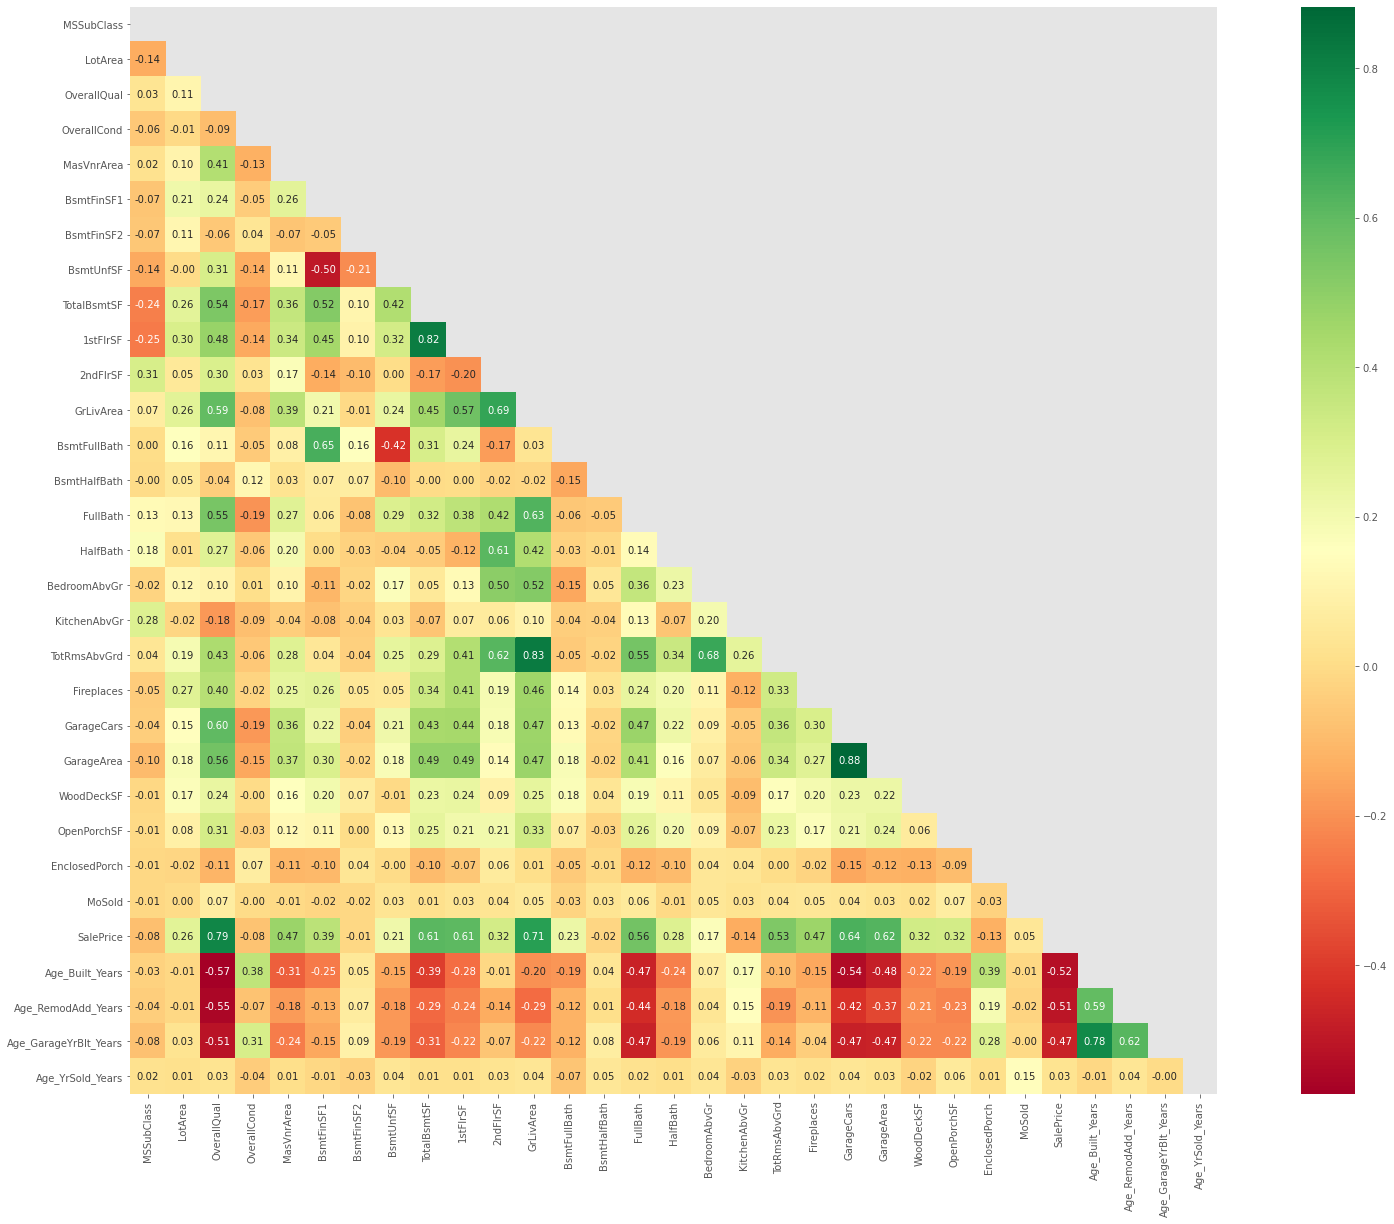

In [72]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()

From this list, we will be picking the top 10 most correlated variables with SalePrice

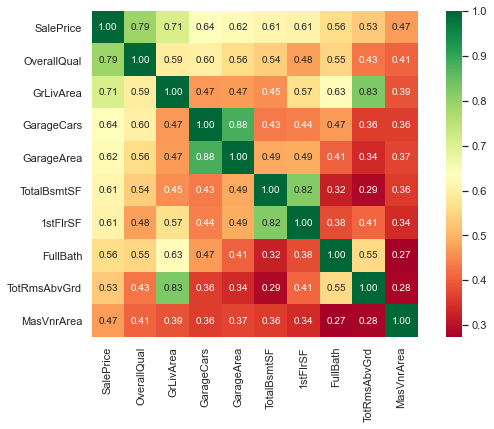

In [73]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()

We can see that:
- GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83
- TotalBsmtSF and 1stFlrSF are highly correlated at 0.82
- GarageArea and GarageCars are highly correlated at 0.88
- OverallQual and SalePrice are highly correlated at o.79

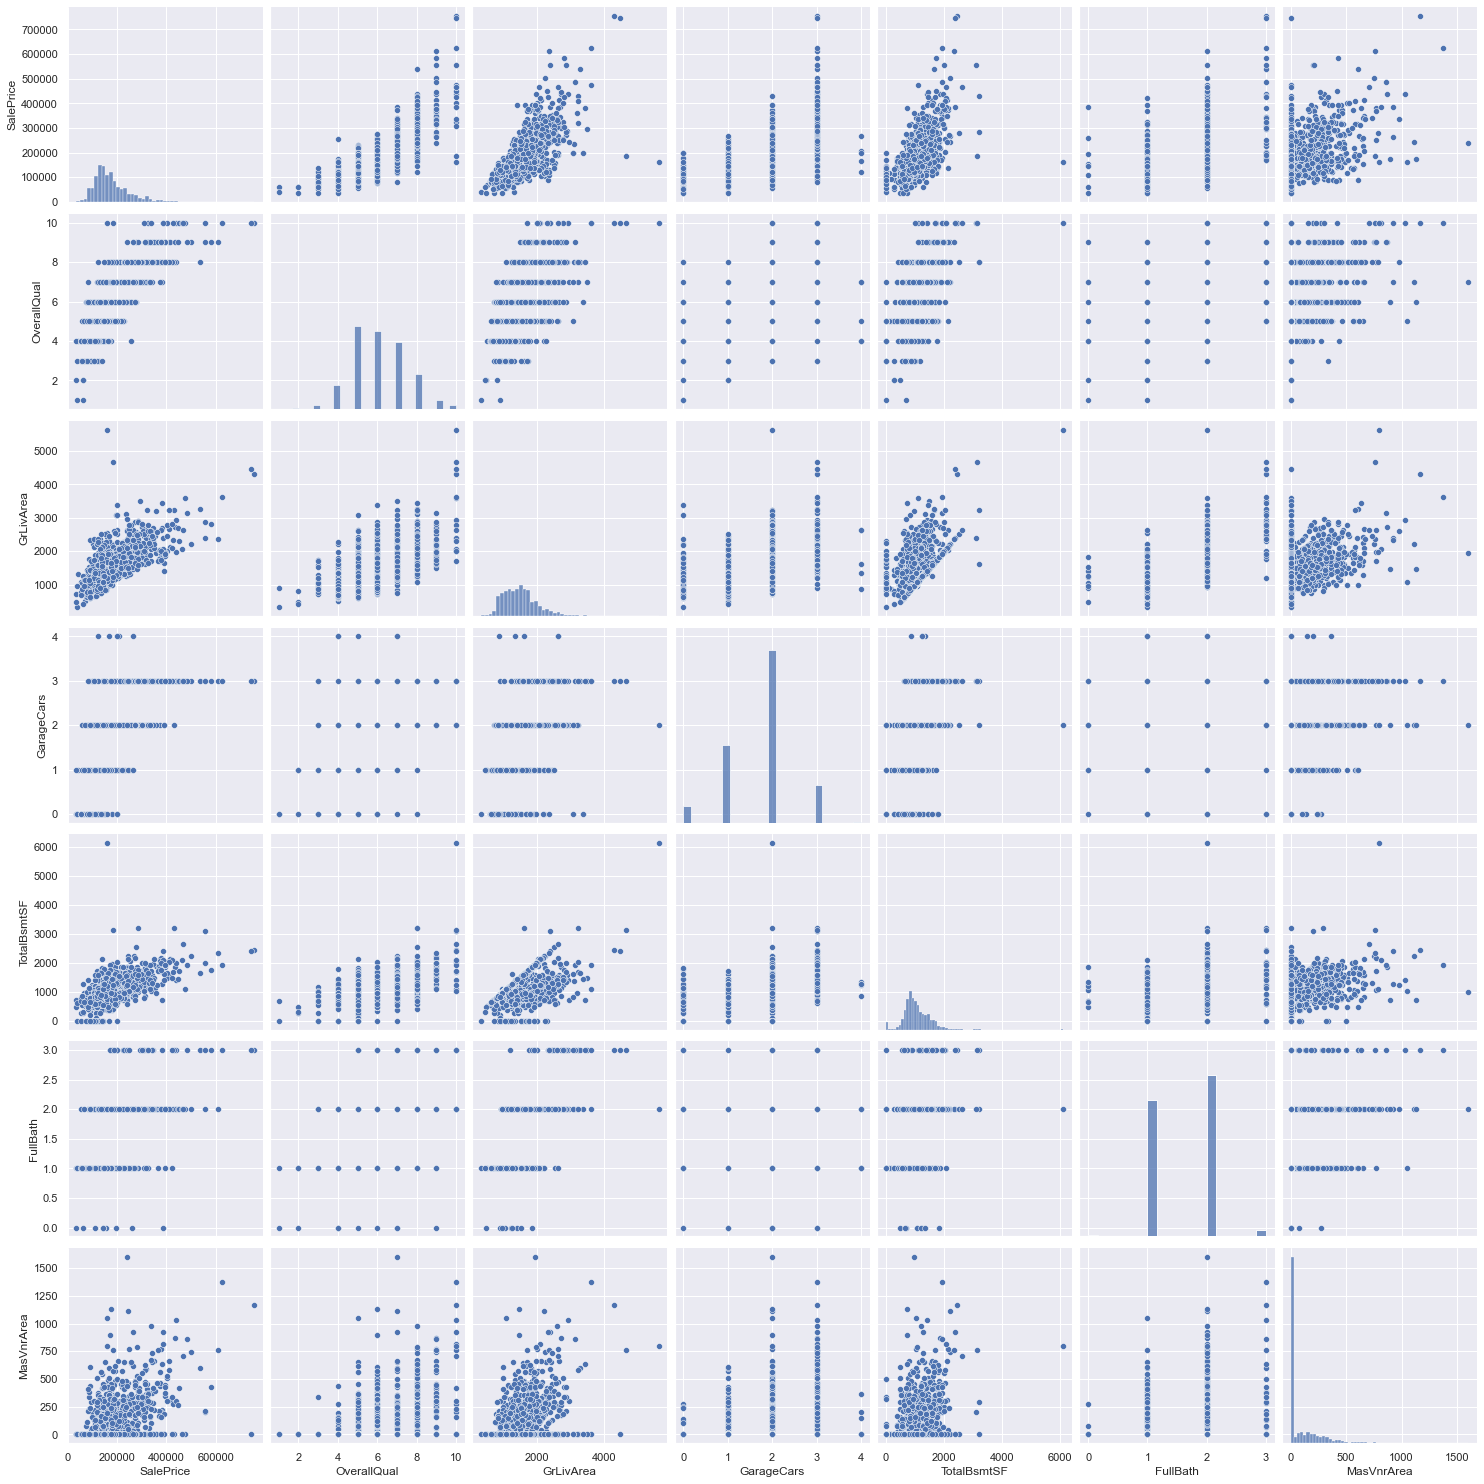

In [74]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

From the pairplot, we can see few observations:
- `TotalBasementSF`, `GrLivingArea` & `OverallQual` are linearly correlated with SalePrice
- `TotalBasementSF` and `GrLivingArea` have a positive correlation
- Distribution of `MasVnrArea` is skewed to the right

# Data Preparation

In [75]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
print(len(cat_var))

33


## Create OHE (One-Hot Encoding) for categorical columns

In [76]:
df_categorical = df.select_dtypes(include='object')

In [77]:
df_categorical.columns.shape

(33,)

In [78]:
# One Hot Encoding on categorical columns
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [79]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

## Dropping the original categorical columns from the dataframe

In [80]:
df.drop(list(df_categorical.columns), axis=1, inplace=True)

In [81]:
df.shape

(1460, 32)

## Merge `df` and `df_dummies` dataframes

In [82]:
df = pd.concat([df, df_dummies], axis=1)

In [83]:
df.shape

(1460, 216)

In [84]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,208500,18,18,18.0,13,12.247694,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284

## Divide data into `X` and `y` for building the model

In [85]:
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df['Transformed_SalePrice']

In [86]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,18,18,18.0,13,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,5

In [87]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

## Split data into train and test sets

In [88]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
print(X_train.shape)
print(y_train.shape)

(1022, 214)
(1022,)


In [91]:
print(X_test.shape)
print(y_test.shape)

(438, 214)
(438,)


In [92]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 216 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

## Applying MinMax scaling on numerical features (excluding dummified columns)

In [93]:
# Getting numerical variables
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_RemodAdd_Years',
       'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

In [94]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

In [95]:
print(X_train.shape)
print(X_test.shape)

(1022, 214)
(438, 214)


# Modeling using Linear Regression

## Building base model

In [96]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [97]:
# Base Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [98]:
# Checking co-efficients for all features
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-3.851381e-02
LotArea,2.338511e-01
OverallQual,4.509483e-01
OverallCond,2.380489e-01
MasVnrArea,-6.285683e-02
BsmtFinSF1,2.772679e+10
BsmtFinSF2,5.536515e+09
BsmtUnfSF,1.147586e+10
TotalBsmtSF,-3.001607e+10
1stFlrSF,-9.024096e-01


In [99]:
# Checking the Intercept
regressor.intercept_

10.637191144637578

In [100]:
# Making predictions on test data using the model
y_pred = regressor.predict(X_test)

In [101]:
# Showing actual and predicted values side by side
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
892,11.947949,11.925951
1105,12.691580,12.752073
413,11.652687,11.534772
522,11.976659,12.122229
1036,12.661914,12.738813
...,...,...
331,11.842229,11.771581
323,11.745425,11.736640
650,12.235389,12.279469
439,11.608236,11.702655


In [102]:
X_train.shape

(1022, 214)

In [103]:
X_test.shape

(438, 214)

In [104]:
# Import r2_score and mean squared error from library
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9224310244144335
Test r2 score is : -3.477508062795905e+17
Train RSS score is : 12.288149108980857
Test RSS score is : 2.5839630708570292e+19
Train MSE score is : 0.01202362926514761
Test MSE score is : 5.899459065883628e+16


As we can see the train score is good, but test score is really underwhelming. This is the same behavior for Mean Squared Error as well.
This means that the model is overfitting.

**Approach** <br>
As the columns are high, we will use RFE (Recursive Feature Elimination) approach to select 50 columns first and remove columns with high VIF

## Model 1: Building model using RFE

In [106]:
# Importing RFE from library
from sklearn.feature_selection import RFE

In [107]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

Out of 214 features, we will go ahead and select 50 initially

In [108]:
# Instantiating a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [109]:
# Checking list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 101),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 7),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 128),
 ('FullBath', False, 25),
 ('HalfBath', False, 31),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 85),
 ('TotRmsAbvGrd', False, 20),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 125),
 ('WoodDeckSF', False, 40),
 ('OpenPorchSF', False, 143),
 ('EnclosedPorch', False, 21),
 ('MoSold', False, 58),
 ('Age_Built_Years', True, 1),
 ('Age_RemodAdd_Years', False, 14),
 ('Age_GarageYrBlt_Years', False, 140),
 ('Age_YrSold_Years', False, 147),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 117),
 ('LotShape_IR

In [110]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'Age_Built_Years',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'BsmtQual_TA', 'BsmtCond_None', 'BsmtExposure_None',
       'BsmtFinType1_None', 'HeatingQC_Po', 'Functional_Maj2',
       'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_None',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_ConLD',
       'SaleType_Oth'],
      dtype='object')

In [111]:
# Looking at the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       ...
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=164)

## Model 2: Building model using 50 features

In [112]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[col]

In [113]:
X_train_rfe.shape

(1022, 50)

In [114]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [116]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.888
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     164.8
Date:                   Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                           21:19:55   Log-Likelihood:                 622.54
No. Observations:                   1022   AIC:                            -1149.
Df Residuals:                        974   BIC:                            -912.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [117]:
HighVIF = checkVIF(X_train_new)

Getting features that have VIF over 5

In [118]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
41,GarageQual_None,inf
35,BsmtFinType1_None,inf
34,BsmtExposure_None,inf
33,BsmtCond_None,inf
46,GarageCond_None,inf
0,const,923.08
9,GrLivArea,168.88
48,GarageCond_TA,146.28
8,2ndFlrSF,119.54
43,GarageQual_TA,112.74


In [119]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [120]:
len(highVIF_columns)

19

In [121]:
highVIF_columns.remove('const')

In [122]:
len(highVIF_columns)

18

In [123]:
highVIF_columns

['GarageQual_None',
 'BsmtFinType1_None',
 'BsmtExposure_None',
 'BsmtCond_None',
 'GarageCond_None',
 'GrLivArea',
 'GarageCond_TA',
 '2ndFlrSF',
 'GarageQual_TA',
 '1stFlrSF',
 'MSZoning_RL',
 'GarageCond_Fa',
 'GarageQual_Fa',
 'MSZoning_RM',
 'GarageQual_Gd',
 'GarageCond_Gd',
 'MSZoning_FV',
 'GarageCond_Po']

## Deleting all columns with high VIF

In [124]:
X_train_rfe.shape

(1022, 50)

In [125]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [126]:
X_train_rfe.shape

(1022, 32)

In [127]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,BsmtFullBath,BedroomAbvGr,Fireplaces,GarageCars,Age_Built_Years,MSZoning_RH,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_Twnhs,Exterior1st_BrkComm,Exterior1st_BrkFace,BsmtQual_TA,HeatingQC_Po,Functional_Maj2,Functional_Sev,GarageQual_Po,SaleType_ConLD,SaleType_Oth
135,0.000000,0.042534,0.666667,0.625,0.000000,0.558219,0.000000,0.375,0.333333,0.50,0.289855,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1452,0.941176,0.011101,0.444444,0.500,0.096917,0.000000,0.333333,0.250,0.000000,0.50,0.036232,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,0.235294,0.034308,0.666667,0.500,0.004252,0.313356,0.000000,0.375,0.000000,0.50,0.007246,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,0.000000,0.048470,0.888889,0.500,0.000000,0.815497,0.000000,0.375,0.333333,0.75,0.028986,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,0.235294,0.043782,0.666667,0.625,0.068214,0.029966,0.333333,0.375,0.333333,0.50,0.101449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Final Model
We will be building the Final model with 32 features

In [128]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.726742
MSSubClass              -0.083176
LotArea                  0.539378
OverallQual              1.001830
OverallCond              0.371510
BsmtFinSF1               0.390031
BsmtUnfSF                0.105406
BsmtFullBath             0.174377
BedroomAbvGr             0.580791
Fireplaces               0.219470
GarageCars               0.448252
Age_Built_Years         -0.341551
MSZoning_RH             -0.020434
LotShape_IR3            -0.186734
LandContour_HLS          0.104736
LandContour_Low          0.092043
LandContour_Lvl          0.077097
Neighborhood_ClearCr     0.150958
Neighborhood_Crawfor     0.162664
Neighborhood_NoRidge     0.162066
Neighborhood_NridgHt     0.132871
Neighborhood_StoneBr     0.199406
Neighborhood_Veenker     0.103455
BldgType_Twnhs          -0.105690
Exterior1st_BrkComm     -0.309789
Exterior1st_BrkFace      0.103714
BsmtQual_TA             -0.052982
HeatingQC_Po            -0.285560
Functional_Maj2         -0.216724
Functional_Sev

In [129]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.849
Method:                    Least Squares   F-statistic:                     180.4
Date:                   Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                           21:19:55   Log-Likelihood:                 484.82
No. Observations:                   1022   AIC:                            -903.6
Df Residuals:                        989   BIC:                            -741.0
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7267      0.047    229.328      0.000      10.635      10.819
MSSubClass              -0.0832      0.023     -3.673      0.000      -0.128      -0.039
LotArea                  0.5394      0.111      4.849      0.000       0.321       0.758
OverallQual              1.0018      0.052     19.147      0.000       0.899       1.105
OverallCond              0.3715      0.040      9.173      0.000       0.292       0.451
BsmtFinSF1               0.3900      0.096      4.075      0.000       0.202       0.578
BsmtUnfSF                0.1054      0.037      2.845      0.005       0.033       0.178
BsmtFullBath             0.1744      0.038      4.638      0.000       0.101       0.248
BedroomAbvGr             0.5808      0.052     11.205      0.000       0.479       0.683
Fireplaces               0.2195      0.026      8.330      0.000       0.168       0.271
GarageCars               0.4483      0.035     12.634      0.000       0.379       0.518
Age_Built_Years         -0.3416      0.035     -9.831      0.000      -0.410      -0.273
MSZoning_RH             -0.0204      0.044     -0.467      0.641      -0.106       0.065
LotShape_IR3            -0.1867      0.058     -3.196      0.001      -0.301      -0.072
LandContour_HLS          0.1047      0.039      2.701      0.007       0.029       0.181
LandContour_Low          0.0920      0.044      2.079      0.038       0.005       0.179
LandContour_Lvl          0.0771      0.026      2.959      0.003       0.026       0.128
Neighborhood_ClearCr     0.1510      0.040      3.772      0.000       0.072       0.229
Neighborhood_Crawfor     0.1627      0.028      5.710      0.000       0.107       0.219
Neighborhood_NoRidge     0.1621      0.031      5.199      0.000       0.101       0.223
Neighborhood_NridgHt     0.1329      0.025      5.361      0.000       0.084       0.182
Neighborhood_StoneBr     0.1994      0.037      5.383      0.000       0.127       0.272
Neighborhood_Veenker     0.1035      0.056      1.857      0.064      -0.006       0.213
BldgType_Twnhs          -0.1057      0.033     -3.227      0.001      -0.170      -0.041
Exterior1st_BrkComm     -0.3098      0.110     -2.824      0.005      -0.525      -0.095
Exterior1st_BrkFace      0.1037      0.027      3.810      0.000       0.050       0.157
BsmtQual_TA             -0.0530      0.013     -4.011      0.000      -0.079      -0.027
HeatingQC_Po            -0.2856      0.154     -1.859      0.063      -0.587       0.016
Functional_Maj2         -0.2167      0.078     -2.787      0.005      -0.369      -0.064
Functional_Sev          -0.2239      0.154     -1.455      0.146      -0.526       0.078
GarageQual_Po            0.0047      0.156      0.030      0.976      -0.301       0.310
SaleType_ConLD          

In [130]:
print(X_train_rfe.shape)
print(X_test.shape)

(1022, 32)
(438, 214)


In [131]:
names = X_train_rfe.columns

In [132]:
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]

In [133]:
X_test_new.shape

(438, 32)

In [134]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [135]:
X_test_new.shape

(438, 33)

## Linear Regression Final Model Evaluation

In [136]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8537384198703117
Test r2 score is : 0.8348252098171571
Train RSS score is : 23.170141051639565
Test RSS score is : 12.27331613218098
Train MSE score is : 0.02267137089201523
Test MSE score is : 0.028021269708175756


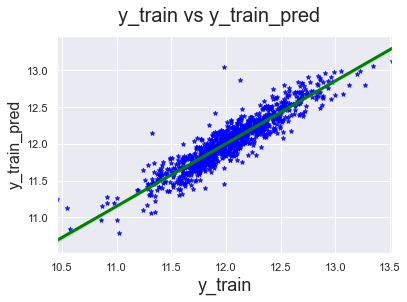

In [137]:
# Plotting graph b/w actual and predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

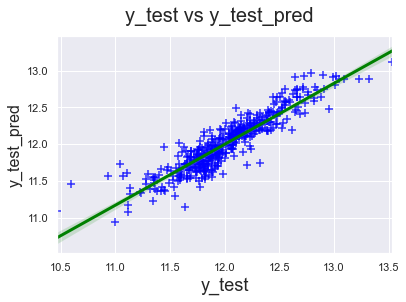

In [138]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

### Residual Analysis of Train

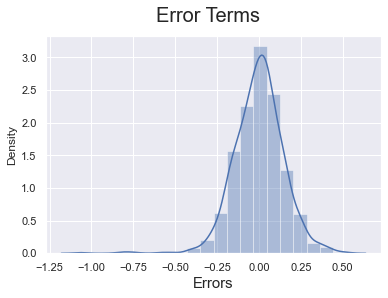

In [139]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

### Residual Analysis of Test

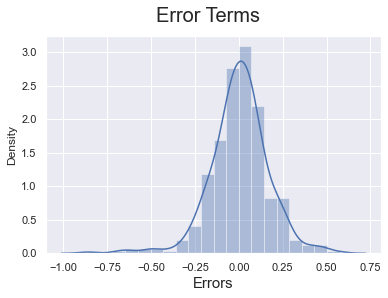

In [140]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Based on this, we can see that using regular Linear Regression:
- Residuals are centered around 0 and normally distributed which satisfies linear regression assumptions
- Both train and test predictions are linear in nature compared to the actual values
- Train r2 score is : 0.8537384198703117
- Test r2 score is : 0.8348252098171571 

We will move ahead with `Lasso` and `Ridge` Regression to perform regulaization which helps models perform well with unseen data while identifying necessary underlying patterns in it.
- In both Ridge and Lasso regression, which both allow some bias to get a significant decrease in variance, thereby pushing the model coefficients towards 0. 
- In Lasso, some of these coefficients become 0, thus resulting in model selection and, hence, easier interpretation, particularly when the number of coefficients is very large.

### Linear Regression features and coefficients

In [141]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
MSSubClass,-0.083176
LotArea,0.539378
OverallQual,1.001830
OverallCond,0.371510
BsmtFinSF1,0.390031
BsmtUnfSF,0.105406
BsmtFullBath,0.174377
BedroomAbvGr,0.580791
Fireplaces,0.219470
GarageCars,0.448252


In [142]:
# List of 32 features
names = X_train_rfe.columns
print(len(names))
print(list(names))

32
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'Age_Built_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'BsmtQual_TA', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po', 'SaleType_ConLD', 'SaleType_Oth']


# Lasso Regression

In [143]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [144]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [145]:
print(X_train.shape)
print(X_test.shape)

(1022, 32)
(438, 32)


In [146]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [147]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013984,0.003675,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.115935,-0.124549,-0.117596,-0.118843,-0.109141,-0.117213,0.004968,1,-0.113587,-0.107452,-0.111083,-0.112642,-0.113785,-0.111710,0.002333
1,0.009392,0.007669,0.001807,0.003614,0.001,{'alpha': 0.001},-0.120190,-0.122986,-0.124579,-0.122196,-0.112822,-0.120555,0.004117,2,-0.117410,-0.111657,-0.116427,-0.118466,-0.118980,-0.116588,0.002618
2,0.000000,0.000000,0.003125,0.006251,0.01,{'alpha': 0.01},-0.145698,-0.156922,-0.170406,-0.154850,-0.139412,-0.153458,0.010570,3,-0.155744,-0.150557,-0.150987,-0.151617,-0.154682,-0.152717,0.002092
3,0.003548,0.006129,0.000000,0.000000,0.05,{'alpha': 0.05},-0.275336,-0.273145,-0.301417,-0.268156,-0.251534,-0.273918,0.016081,4,-0.272356,-0.273262,-0.269128,-0.273013,-0.278071,-0.273166,0.002865
4,0.004845,0.006345,0.003939,0.006060,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [149]:
cv_results.shape

(28, 21)

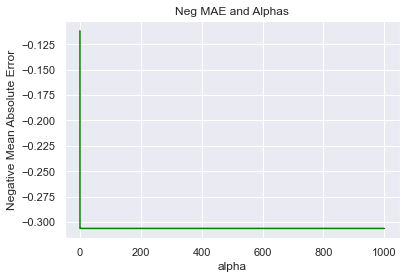

In [150]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

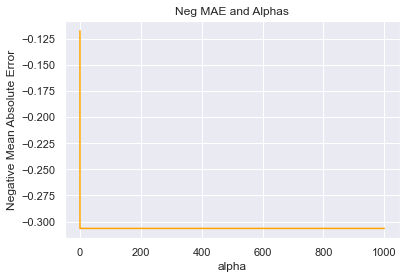

In [151]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

## Getting the optimal value of lambda

In [152]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

## Build final Lasso Regression model

In [153]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [154]:
lasso.coef_

array([-0.08231778,  0.49736352,  1.00823343,  0.36530054,  0.36903439,
        0.09837955,  0.17917204,  0.5741084 ,  0.22248727,  0.44815635,
       -0.34114108, -0.01355624, -0.16787839,  0.09540999,  0.08428515,
        0.06863259,  0.14976494,  0.15889983,  0.15898049,  0.13032592,
        0.19294265,  0.09124849, -0.10477938, -0.25959886,  0.10234659,
       -0.05264831, -0.18402435, -0.19296481, -0.12227068,  0.        ,
        0.08058263,  0.17913272])

## Lasso features and their co-efficients

In [155]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.082318
LotArea,0.497364
OverallQual,1.008233
OverallCond,0.365301
BsmtFinSF1,0.369034
BsmtUnfSF,0.098380
BsmtFullBath,0.179172
BedroomAbvGr,0.574108
Fireplaces,0.222487
GarageCars,0.448156


## Lasso Regression Model Evaluation

In [156]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8533838713869988
Test r2 score is : 0.836612501009672
Train RSS score is : 23.226307123144615
Test RSS score is : 12.140511423897621
Train MSE score is : 0.02272632790914346
Test MSE score is : 0.027718062611638405


# Ridge Regression

In [157]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [158]:
# Get only 32 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]

In [159]:
print(X_train.shape)
print(X_test.shape)

(1022, 32)
(438, 32)


In [160]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [161]:
# Applying lasso regression with 5 fold cross validation

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006234,0.006254,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.115608,-0.125168,-0.117465,-0.118527,-0.109244,-0.117202,0.005122,12,-0.113282,-0.107061,-0.110701,-0.112177,-0.113343,-0.111313,0.002332
1,0.004148,0.005528,0.001523,0.002189,0.001,{'alpha': 0.001},-0.115609,-0.125164,-0.117464,-0.118529,-0.109244,-0.117202,0.005120,11,-0.113283,-0.107062,-0.110703,-0.112179,-0.113345,-0.111314,0.002333
2,0.010253,0.006826,0.000000,0.000000,0.01,{'alpha': 0.01},-0.115616,-0.125117,-0.117453,-0.118542,-0.109250,-0.117196,0.005104,9,-0.113289,-0.107072,-0.110720,-0.112192,-0.113361,-0.111327,0.002333
3,0.000000,0.000000,0.003142,0.006283,0.05,{'alpha': 0.05},-0.115647,-0.124915,-0.117415,-0.118599,-0.109276,-0.117170,0.005034,8,-0.113319,-0.107123,-0.110790,-0.112252,-0.113429,-0.111383,0.002332
4,0.003530,0.006111,0.000604,0.001208,0.1,{'alpha': 0.1},-0.115687,-0.124687,-0.117380,-0.118663,-0.109306,-0.117144,0.004956,6,-0.113355,-0.107193,-0.110872,-0.112325,-0.113509,-0.111451,0.002327


In [163]:
cv_results.shape

(28, 21)

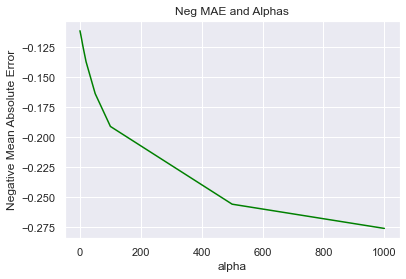

In [164]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

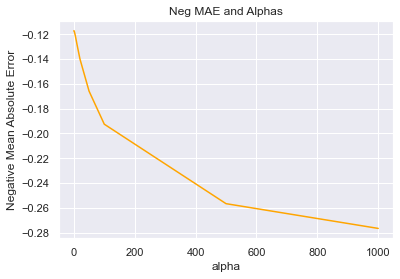

In [165]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

## Getting the optimal value of lambda

In [166]:
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

0.4

## Build final Ridge Regression model

In [167]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [168]:
ridge.coef_

array([-0.08285586,  0.45473297,  0.97795221,  0.36773851,  0.36745082,
        0.1069479 ,  0.18390886,  0.56740614,  0.22915183,  0.45049682,
       -0.3428986 , -0.02088155, -0.1642488 ,  0.10429289,  0.09311529,
        0.07316042,  0.15361947,  0.16091084,  0.1643787 ,  0.13562764,
        0.19773375,  0.09996432, -0.1070506 , -0.26236613,  0.10391142,
       -0.05461148, -0.20585973, -0.20131215, -0.15848392,  0.00631176,
        0.09212639,  0.19817061])

## Ridge features and their co-efficients

In [169]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.082856
LotArea,0.454733
OverallQual,0.977952
OverallCond,0.367739
BsmtFinSF1,0.367451
BsmtUnfSF,0.106948
BsmtFullBath,0.183909
BedroomAbvGr,0.567406
Fireplaces,0.229152
GarageCars,0.450497


## Ridge Regression Model Evaluation

In [170]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8533943714470189
Test r2 score is : 0.8347719667077115
Train RSS score is : 23.224643748036122
Test RSS score is : 12.277272362507432
Train MSE score is : 0.022724700340544152
Test MSE score is : 0.028030302197505554


# Comparison of co-efficients after Regularization

In [171]:
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [172]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.001830,0.977952,1.008233
BedroomAbvGr,0.580791,0.567406,0.574108
LotArea,0.539378,0.454733,0.497364
GarageCars,0.448252,0.450497,0.448156
BsmtFinSF1,0.390031,0.367451,0.369034
OverallCond,0.371510,0.367739,0.365301
Fireplaces,0.219470,0.229152,0.222487
Neighborhood_StoneBr,0.199406,0.197734,0.192943
BsmtFullBath,0.174377,0.183909,0.179172
SaleType_Oth,0.281333,0.198171,0.179133


**Observations**
- There are 32 significant features in the model
- The features are sorted in the order of decreasing significance of the co-efficients (i.e. The most significant feature is at the top, followed by the next significant one and so on...)
- The co-efficients are very close for Ridge and Lasso Regression models post regularization with slight variance to the model created by Linear Regression
- However, the resultant selection of significant feature order still remains the same

# Comparison of metrics after Regularization

In [173]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.853738,0.853394,0.853384
1,R2 Score (Test),0.834825,0.834772,0.836613
2,RSS (Train),23.170141,23.224644,23.226307
3,RSS (Test),12.273316,12.277272,12.140511
4,MSE (Train),0.150570,0.150747,0.150753
5,MSE (Test),0.167396,0.167423,0.166487


**Observations**
- The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso
- Lasso has better scores by a very slight margin compared to Ridge and Linear Regression

---

# Subjective Questions

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [174]:
print(f"The optimal value for Ridge Regression is : {optimalvalue_ridge}")
print(f"The optimal value for Lasso Regression is : {optimalvalue_lasso}")

The optimal value for Ridge Regression is : 0.4
The optimal value for Lasso Regression is : 0.0001


In [175]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 0.8 and Lasso is 0.0002


### Build Lasso Regression model

In [176]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [177]:
lasso.coef_

array([-0.08153581,  0.45539823,  1.01459607,  0.35903326,  0.347902  ,
        0.09126356,  0.18395801,  0.56738357,  0.2255314 ,  0.44806562,
       -0.34081684, -0.00666623, -0.14901914,  0.08605579,  0.07648378,
        0.06014341,  0.14857913,  0.1551641 ,  0.15591511,  0.12779511,
        0.18650357,  0.07904956, -0.10383062, -0.20944115,  0.10097671,
       -0.05229195, -0.08248692, -0.16920951, -0.02065169,  0.        ,
        0.06399086,  0.07695524])

### Lasso features and their co-efficients

In [178]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.081536
LotArea,0.455398
OverallQual,1.014596
OverallCond,0.359033
BsmtFinSF1,0.347902
BsmtUnfSF,0.091264
BsmtFullBath,0.183958
BedroomAbvGr,0.567384
Fireplaces,0.225531
GarageCars,0.448066


### Lasso Regression Model Evaluation

In [179]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8523207180197367
Test r2 score is : 0.8376052827703083
Train RSS score is : 23.394727384002906
Test RSS score is : 12.066742755052546
Train MSE score is : 0.02289112268493435
Test MSE score is : 0.027549640993270653


### Build Ridge Regression model

In [180]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.8)

In [181]:
ridge.coef_

array([-0.08261515,  0.39628195,  0.95615408,  0.36320649,  0.34709173,
        0.10761949,  0.19023332,  0.5521861 ,  0.23719147,  0.45293032,
       -0.34370213, -0.02114234, -0.14715668,  0.10331733,  0.09231157,
        0.06959526,  0.15469776,  0.15942987,  0.16645984,  0.13794386,
        0.19594439,  0.09657571, -0.10787442, -0.2289582 ,  0.10355886,
       -0.05606525, -0.16176334, -0.18840658, -0.12295113,  0.00719415,
        0.08726406,  0.15284197])

### Ridge features and their co-efficients

In [182]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.082615
LotArea,0.396282
OverallQual,0.956154
OverallCond,0.363206
BsmtFinSF1,0.347092
BsmtUnfSF,0.107619
BsmtFullBath,0.190233
BedroomAbvGr,0.552186
Fireplaces,0.237191
GarageCars,0.452930


### Ridge Regression Model Evaluation

In [183]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.852695585838757
Test r2 score is : 0.8339056419918301
Train RSS score is : 23.335342409256153
Test RSS score is : 12.341644638079044
Train MSE score is : 0.022833016056023635
Test MSE score is : 0.028177270863194166


### Comparison of co-efficients after Regularization

In [184]:
comparison['Ridge_Double'] = ridge.coef_
comparison['Lasso_Double'] = lasso.coef_

In [185]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.001830,0.977952,1.008233,0.956154,1.014596
BedroomAbvGr,0.580791,0.567406,0.574108,0.552186,0.567384
LotArea,0.539378,0.454733,0.497364,0.396282,0.455398
GarageCars,0.448252,0.450497,0.448156,0.452930,0.448066
BsmtFinSF1,0.390031,0.367451,0.369034,0.347092,0.347902
OverallCond,0.371510,0.367739,0.365301,0.363206,0.359033
Fireplaces,0.219470,0.229152,0.222487,0.237191,0.225531
Neighborhood_StoneBr,0.199406,0.197734,0.192943,0.195944,0.186504
BsmtFullBath,0.174377,0.183909,0.179172,0.190233,0.183958
SaleType_Oth,0.281333,0.198171,0.179133,0.152842,0.076955


### Comparison of metrics after Regularization

In [186]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

final_metric = pd.concat([final_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.853738,0.853394,0.853384,0.852696,0.852321
1,R2 Score (Test),0.834825,0.834772,0.836613,0.833906,0.837605
2,RSS (Train),23.170141,23.224644,23.226307,23.335342,23.394727
3,RSS (Test),12.273316,12.277272,12.140511,12.341645,12.066743
4,MSE (Train),0.150570,0.150747,0.150753,0.151106,0.151298
5,MSE (Test),0.167396,0.167423,0.166487,0.167861,0.165981


**Observations**

After doubling the optimal lambda values for both Ridge and Lasso Regression, we don't see any significant changes in both `metrics` and the `features`.
There are few, very minor variations here and there but overall very similar.

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [187]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.853738,0.853394,0.853384,0.852696,0.852321
1,R2 Score (Test),0.834825,0.834772,0.836613,0.833906,0.837605
2,RSS (Train),23.170141,23.224644,23.226307,23.335342,23.394727
3,RSS (Test),12.273316,12.277272,12.140511,12.341645,12.066743
4,MSE (Train),0.150570,0.150747,0.150753,0.151106,0.151298
5,MSE (Test),0.167396,0.167423,0.166487,0.167861,0.165981


**Observations**

Below are the reasons why I will prefer Lasso over Ridge Regression:
- The values of R2 Score, RSS and MSE for Lasso Regression are slightly better than Ridge Regression in this particular model
- In Lasso Regression, we can push the model co-efficients to actual zero value. This means that the features that have co-efficent value of 0 can be removed from the model. This results in feature selection
- Model complexity also reduces because we can remove features with zero co-efficients

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. <br>
You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Looking at the top 5 important predictor variables in Lasso model

In [204]:
comparison.sort_values(by='Lasso',ascending=False).head()

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.001830,0.977952,1.008233,0.956154,1.014596
BedroomAbvGr,0.580791,0.567406,0.574108,0.552186,0.567384
LotArea,0.539378,0.454733,0.497364,0.396282,0.455398
GarageCars,0.448252,0.450497,0.448156,0.452930,0.448066
BsmtFinSF1,0.390031,0.367451,0.369034,0.347092,0.347902


In [188]:
# Looking at the current top 5 important predictor variables in Lasso model
comparison.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual     1.008233
BedroomAbvGr    0.574108
LotArea         0.497364
GarageCars      0.448156
BsmtFinSF1      0.369034
Name: Lasso, dtype: float64

In [189]:
# Creating a list to hold the current top 5 important predictor variables
top5_names = list(comparison['Lasso'].sort_values(ascending=False).head(5).index)
top5_names

['OverallQual', 'BedroomAbvGr', 'LotArea', 'GarageCars', 'BsmtFinSF1']

In [190]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_names, axis=1)
X_test = X_test.drop(top5_names, axis=1)

In [191]:
print(X_train.shape)
print(X_test.shape)

(1022, 27)
(438, 27)


In [192]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [193]:
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003800,0.006055,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.171622,-0.168942,-0.171890,-0.167995,-0.170622,-0.170214,0.001516,1,-0.163416,-0.163817,-0.163459,-0.164536,-0.163576,-0.163761,0.000412
1,0.003002,0.005026,0.000000,0.000000,0.001,{'alpha': 0.001},-0.172148,-0.170105,-0.175079,-0.167112,-0.167741,-0.170437,0.002930,2,-0.164651,-0.165521,-0.164496,-0.166416,-0.165641,-0.165345,0.000703
2,0.003350,0.006701,0.003587,0.004017,0.01,{'alpha': 0.01},-0.208796,-0.204221,-0.221863,-0.210358,-0.187427,-0.206533,0.011182,3,-0.204860,-0.205908,-0.201178,-0.203329,-0.207517,-0.204558,0.002173
3,0.003604,0.006654,0.003773,0.006590,0.05,{'alpha': 0.05},-0.275336,-0.273145,-0.301417,-0.268156,-0.251534,-0.273918,0.016081,4,-0.272356,-0.273262,-0.269128,-0.273013,-0.278071,-0.273166,0.002865
4,0.004176,0.006888,0.000000,0.000000,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [195]:
cv_results.shape

(28, 21)

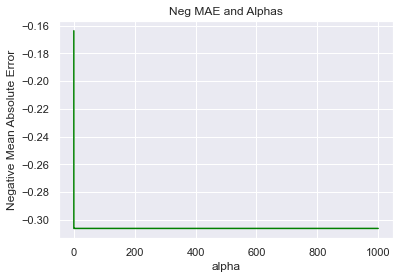

In [196]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

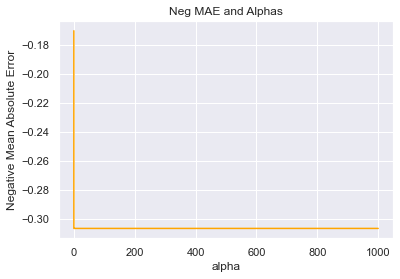

In [197]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

### Getting the optimal value of lambda

In [198]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

### Build final Lasso Regression model

In [199]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [200]:
lasso.coef_

array([-0.05049705,  0.59153222,  0.35922415,  0.35101274,  0.53599792,
       -0.72949681, -0.00865265, -0.        ,  0.15339778,  0.04098061,
        0.04332581,  0.20219306,  0.1895562 ,  0.38616691,  0.31797669,
        0.33439227,  0.09730883, -0.20310195, -0.35840204,  0.11669826,
       -0.1059313 , -0.17412318, -0.32798534, -0.03747577,  0.        ,
        0.12181118,  0.        ])

### Lasso features and their co-efficients

In [201]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_

### Getting the new top 5 important predictor variables via Lasso Regression

In [202]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
OverallCond,0.591532
Fireplaces,0.535998
Neighborhood_NoRidge,0.386167
BsmtUnfSF,0.359224
BsmtFullBath,0.351013


## Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

**Answer**

A robust model has low variance. This means that an unprecendented change in one or more features does not significantly alter the value of the predicted variable.
Similarly, a generalizable model has reduced model complexity. As the number of features increase in the model, it becomes more complex which usually leads to low bias but high variance.
A generalizable model has just enough features that it has as much low variance as possible.

This can be observed from the Bias-Variance tradeoff visual shown below.

The OLS (Ordinary least squares) regression model is very sensitive to outliers and they induce high variance. To reduce this, we can go ahead with regularization (Ridge/Lasso) which include a penalty term in the cost function of the model.
This penalty term will move the coefficents of the model towards 0 and thus it reduces model complexity (as feature addition is heavily discouraged). This reduces overfitting in the model.

So regularization gets us high variance with a small trade-off in bias. Thus it helps us build a model which is robust and generalizable.
A robust and generalizable model will have a good, consistent train as well as test accuracy.